## Comparing inter-attribute logical dependencies of synthetic data generated by state-of-the art generative models with respect to the real data
- Load real data and synthetic data generated by seven generative models
- Apply Q_function on real and synthetic data to check the inter-attribute logical dependencies (only for categorical features)
- Extract inter-attribute logical dependencies of real and synthetic data based on Q_scores
- If Q_score for a perticular pair of features is 0 then those features are functionally dependent, if Q_score is 1 then they are independent of each other and if Q_scores lies between 0 and 1 then those feature pairs are logically dependent
- All the functions related to this notebook are in the file Functions.py 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from Functions import *

## Real_data

In [2]:
data = pd.read_csv('Real_datasets/LiverCirrhosis.csv')

In [3]:
categorical_features = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]

In [4]:
data.shape

(418, 19)

In [5]:
data['Stage'].value_counts()

Stage
2.0    156
3.0    148
1.0     93
0.0     21
Name: count, dtype: int64

In [6]:
len(categorical_features)

8

In [7]:
check_categories(data, categorical_features)

There are no features with same entries


In [8]:
liver_FD_data = data[categorical_features] 
liver_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_FD_data.csv',index=False)

## Synthetic_data generated by CTGAN

In [9]:
ctgan_syn_data = pd.read_csv('Synthetic_datasets/CTGAN/synthetic_liver_cirrhosis_ctgan.csv')

In [10]:
check_categories(ctgan_syn_data, categorical_features)

There are no features with same entries


In [11]:
liver_ctgan_FD_data = ctgan_syn_data[categorical_features] 
liver_ctgan_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_ctgan_FD_data.csv',index=False)

## Synthetic_data generated by CTABGAN

In [12]:
ctabgan_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN/synthetic_liver_cirrhosis_ctabgan.csv')

In [13]:
check_categories(ctabgan_syn_data, categorical_features)

There are no features with same entries


In [14]:
liver_ctabgan_FD_data = ctabgan_syn_data[categorical_features] 
liver_ctabgan_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_ctabgan_FD_data.csv',index=False)

## Synthetic data generated by CTABGAN+

In [15]:
ctabgan_plus_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN+/synthetic_liver_cirrhosis_ctabgan+.csv')
ctabgan_plus_syn_data = ctabgan_plus_syn_data.drop_duplicates()

In [16]:
check_categories(ctabgan_plus_syn_data, categorical_features)

There are no features with same entries


In [17]:
liver_ctabgan_plus_FD_data = ctabgan_plus_syn_data[categorical_features] 
liver_ctabgan_plus_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_ctabgan_plus_FD_data.csv',index=False)

## Synthetic data generated by TVAE

In [18]:
tvae_syn_data = pd.read_csv('Synthetic_datasets/TVAE/synthetic_liver_cirrhosis_tvae.csv')

In [19]:
check_categories(tvae_syn_data, categorical_features)

For column Sex
1
For column Ascites
1
There are no features with same entries


In [20]:
liver_tvae_FD_data = tvae_syn_data[categorical_features] 
liver_tvae_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_tvae_FD_data.csv',index=False)

## Synthetic_data generated by NextConvGeN

In [21]:
nextconvgen_syn_data = pd.read_csv('Synthetic_datasets/NextConvGeN/synthetic_liver_cirrhosis_nextconvgen.csv')
nextconvgen_syn_data = nextconvgen_syn_data.drop_duplicates()                               

In [22]:
check_categories(nextconvgen_syn_data, categorical_features)

There are no features with same entries


In [23]:
liver_nextconvgen_FD_data = nextconvgen_syn_data[categorical_features] 
liver_nextconvgen_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_nextconvgen_FD_data.csv',index=False)

## Synthetic_data generated by TabDDPM

In [24]:
tabddpm_syn_data = pd.read_csv('Synthetic_datasets/TabDDPM/synthetic_liver_cirrhosis_tabddpm.csv')
tabddpm_syn_data = tabddpm_syn_data.drop_duplicates()
tabddpm_syn_data = tabddpm_syn_data.sample(n=data.shape[0],random_state=42,ignore_index=True)

In [25]:
check_categories(tabddpm_syn_data, categorical_features)

There are no features with same entries


In [26]:
liver_tabddpm_FD_data = tabddpm_syn_data[categorical_features] 
liver_tabddpm_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_tabddpm_FD_data.csv',index=False)

## Synthetic data generated by TabuLa

In [27]:
tabula_syn_data = pd.read_csv('Synthetic_datasets/TabuLa/synthetic_liver_cirrhosis_tabula.csv')
tabula_syn_data.duplicated().sum()

95

In [28]:
tabula_syn_data = tabula_syn_data.drop_duplicates()
tabula_syn_data.duplicated().sum()

0

In [29]:
tabula_syn_data.shape

(323, 19)

In [30]:
check_categories(tabula_syn_data, categorical_features)

There are no features with same entries


In [31]:
liver_tabula_FD_data = tabula_syn_data[categorical_features] 
liver_tabula_FD_data.to_csv('FDTool_data/Liver_cirrhosis/liver_tabula_FD_data.csv',index=False)

## Q_score calculation for real and synthetic data
- Identify logical dependencies in real and synthetic data using Q_metric function and compare whether they are same or not
- For each feature pair we will get Q_scores for both real and syntehtic. Plot them using feature_pair_plot function to see the common dependencies (located on diagonal line)
### Q_scores of real data

In [32]:
Q_metric_real = Q_metric(data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


## Histogram of Q_scores for real data
- For any given data, distibution of Q_scores helps in identifying the presence of logical and functional dependencies

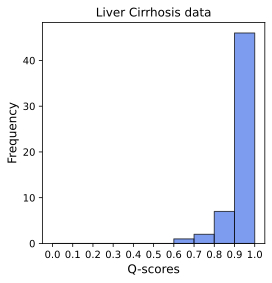

In [33]:
## defining colors
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}

# Specify the bin edges to include values from 0.0 to 1.0
bin_edges = np.arange(0.0, 1.1, 0.1)

Q_metric_real = [round(value, 2) for value in Q_metric_real]
# Create a histogram with custom bin edges

# Set the figure size
plt.figure(figsize=(4, 4))  # Adjust width and height as needed
plt.hist(Q_metric_real, bins=bin_edges, edgecolor='black',align='mid',color=custom_palette[0],alpha=0.7)

# Add labels and title
plt.xlabel('Q-scores',fontname='DejaVu Sans', fontsize=12)
plt.ylabel('Frequency',fontname='DejaVu Sans', fontsize=12)
plt.title('Liver Cirrhosis data',fontname='DejaVu Sans', fontsize=12)

# Set x-axis ticks to include values from 0.0 to 1.0
plt.xticks(bin_edges)

# Show the plot
#plt.savefig('liver.png', dpi=300, bbox_inches='tight')
plt.show()


## Q_scores of synthetic data generated by CTGAN 

In [34]:
Q_metric_ctgan = Q_metric(ctgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are no logical dependencies in the data.


KL Divergence score is: 3.8069937544255588


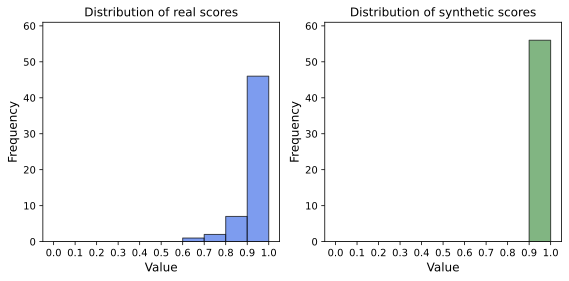

In [35]:
plot_scores(Q_metric_real,Q_metric_ctgan)

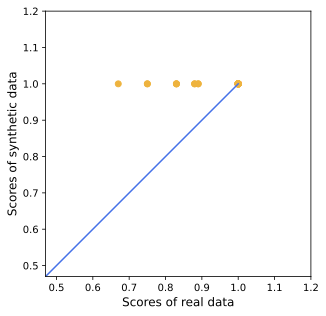

In [36]:
feature_pair_plot(Q_metric_real, Q_metric_ctgan)

## Q_scores of synthetic data genearted by CTABGAN 

In [37]:
Q_metric_ctabgan = Q_metric(ctabgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are no logical dependencies in the data.


KL Divergence score is: 3.8069937544255588


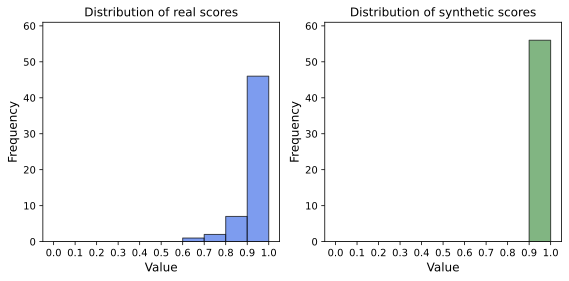

In [38]:
plot_scores(Q_metric_real,Q_metric_ctabgan)

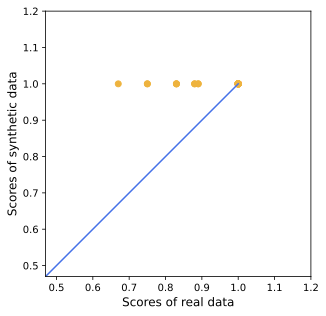

In [39]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan)

## Q_scores of synthetic data genearted by CTABGAN+

In [40]:
Q_metric_ctabgan_plus = Q_metric(ctabgan_plus_syn_data, categorical_features)

There are no functional dependencies in the data.
There are no logical dependencies in the data.


KL Divergence score is: 3.8069937544255588


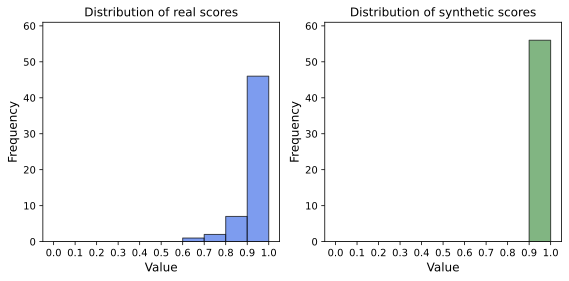

In [41]:
plot_scores(Q_metric_real,Q_metric_ctabgan_plus)

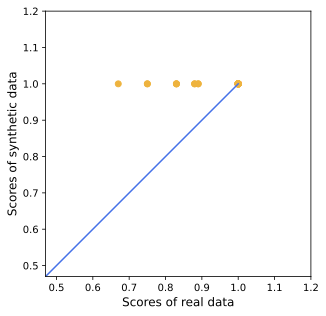

In [42]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan_plus)

## Q_scores of synthetic data genearted by TVAE

In [43]:
Q_metric_tvae = Q_metric(tvae_syn_data, categorical_features)

Status Sex
Functional dependency: Status -> Sex
Status Ascites
Functional dependency: Status -> Ascites
Drug Sex
Functional dependency: Drug -> Sex
Drug Ascites
Functional dependency: Drug -> Ascites
Sex Ascites
Functional dependency: Sex -> Ascites
Ascites Sex
Functional dependency: Ascites -> Sex
Hepatomegaly Sex
Functional dependency: Hepatomegaly -> Sex
Hepatomegaly Ascites
Functional dependency: Hepatomegaly -> Ascites
Spiders Sex
Functional dependency: Spiders -> Sex
Spiders Ascites
Functional dependency: Spiders -> Ascites
Edema Sex
Functional dependency: Edema -> Sex
Edema Ascites
Functional dependency: Edema -> Ascites
Stage Sex
Functional dependency: Stage -> Sex
Stage Ascites
Functional dependency: Stage -> Ascites
There are some logical dependencies in the data.


KL Divergence score is: 3.3928134698340746


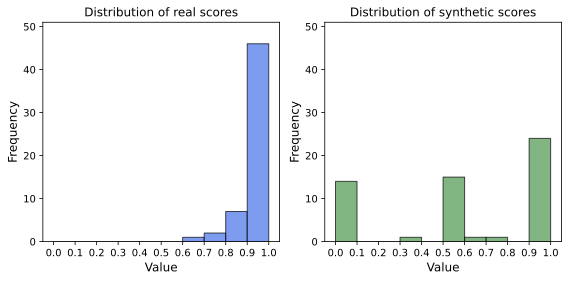

In [44]:
plot_scores(Q_metric_real,Q_metric_tvae)

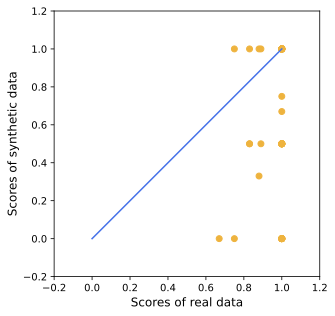

In [45]:
feature_pair_plot(Q_metric_real, Q_metric_tvae)

## Q_scores of synthetic data genearted by NextConvGen

In [46]:
Q_metric_nextconvgen = Q_metric(nextconvgen_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 0.11678031038574294


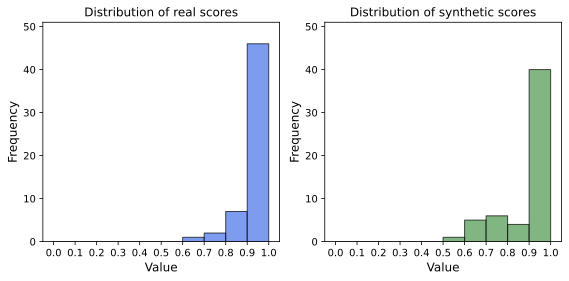

In [47]:
plot_scores(Q_metric_real,Q_metric_nextconvgen)

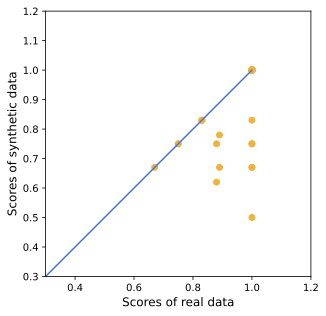

In [48]:
feature_pair_plot(Q_metric_real, Q_metric_nextconvgen)

## Q_scores of synthetic data genearted by TabDDPM

In [49]:
Q_metric_tabddpm = Q_metric(tabddpm_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 0.3181212872446868


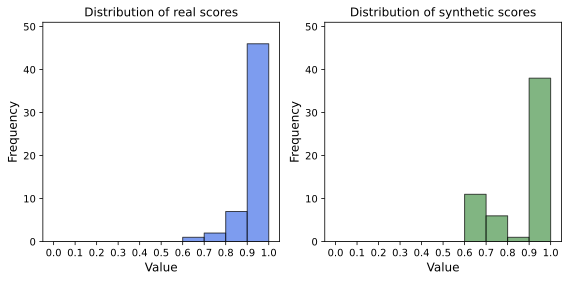

In [50]:
plot_scores(Q_metric_real,Q_metric_tabddpm)

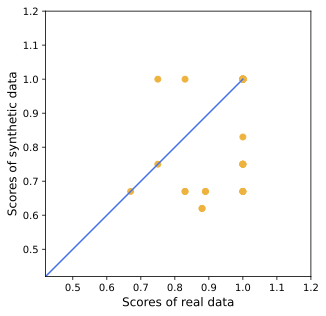

In [51]:
feature_pair_plot(Q_metric_real, Q_metric_tabddpm)

## Q_scores of synthetic data genearted by TabuLa

In [52]:
Q_metric_tabula = Q_metric(tabula_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 0.043093448658125345


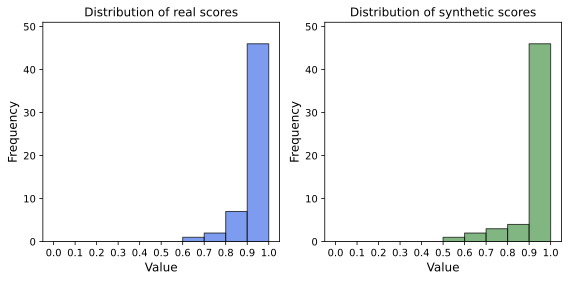

In [53]:
plot_scores(Q_metric_real,Q_metric_tabula)

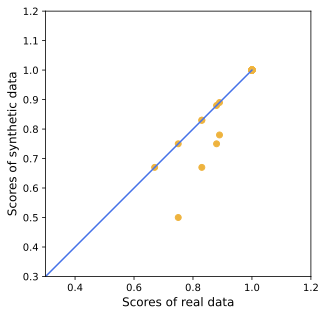

In [54]:
feature_pair_plot(Q_metric_real, Q_metric_tabula)

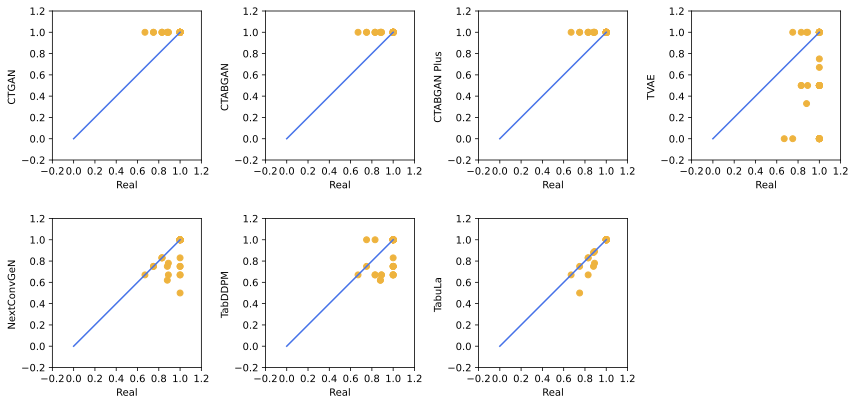

In [55]:
synthetic_data_lists = [Q_metric_ctgan, Q_metric_ctabgan, Q_metric_ctabgan_plus, Q_metric_tvae, Q_metric_nextconvgen, Q_metric_tabddpm, Q_metric_tabula]
feature_pair_plot_all(Q_metric_real, synthetic_data_lists)

## Comparing logical dependencies of real and synthetic data
## CTGAN

In [56]:
df_zero_ctgan, df_one_ctgan, real_dependencies, total_count, ctgan_match = common_dependencies(data,ctgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 0
The pecentange of dependencies preserved in synthetic data is : 0.0


## CTABGAN

In [57]:
df_zero_ctabgan, df_one_ctabgan, real_dependencies, total_count, ctabgan_match = common_dependencies(data,ctabgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 0
The pecentange of dependencies preserved in synthetic data is : 0.0


## CTABGAN+

In [58]:
df_zero_ctabgan_plus, df_one_ctabgan_plus, real_dependencies, total_count, ctabgan_plus_match = common_dependencies(data,ctabgan_plus_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 0
The pecentange of dependencies preserved in synthetic data is : 0.0


## TVAE

In [59]:
df_zero_tvae, df_one_tvae, real_dependencies, total_count, tvae_match = common_dependencies(data,tvae_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 0
The pecentange of dependencies preserved in synthetic data is : 0.0


## NextConvGeN

In [60]:
df_zero_nextconvgen, df_one_nextconvgen, real_dependencies, total_count, nextconvgen_match = common_dependencies(data,nextconvgen_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 12
The pecentange of dependencies preserved in synthetic data is : 100.0


## TabDDPM

In [61]:
df_zero_tabddpm, df_one_tabddpm, real_dependencies, total_count, tabddpm_match = common_dependencies(data,tabddpm_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 9
The pecentange of dependencies preserved in synthetic data is : 75.0


## TabuLa

In [62]:
df_zero_tabula, df_one_tabula, real_dependencies, total_count, tabula_match = common_dependencies(data,tabula_syn_data, categorical_features)

Total number of logical dependencies in real data are: 12
Total number of logical dependencies in synthetic data data are: 12
The pecentange of dependencies preserved in synthetic data is : 100.0
